In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools as tls
from plotly import figure_factory as ff

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
#https://drive.google.com/file/d/1uKw_CKoDLyOf3VH9SPR64_X4E-H10mo8/view
#hahow學校課程 
df=pd.read_csv("hahow_course.csv")
print(df.shape)
df.head()
#有分數評分是零的

(384, 17)


,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets
0,0,LeonTV 空中網球課 - 學會擊球，享受比賽,Leon Tsai,2019-11-07T16:00:00.000Z,2019-10-09T04:00:34.912Z,2020-01-06T16:00:00.000Z,2019-10-09T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,1290,1990,False,INCUBATING,0
1,1,生活要清爽：讓空間煥然一新的整理收納課,欣講堂 xinforum,2019-11-06T16:00:00.000Z,2019-10-08T03:00:36.293Z,2020-01-05T16:00:00.000Z,2019-10-08T02:00:00.000Z,['DIGITAL'],0,0.0,False,30,1200,1580,False,INCUBATING,17
2,2,利息養成現金流：債券入門投資術,Z,2019-11-01T16:00:00.000Z,2019-10-03T04:00:13.830Z,2019-12-31T16:00:00.000Z,NaN,[],0,0.0,False,30,1288,1990,False,INCUBATING,28
3,3,Dropshipping 電商創業 - 零庫存跨境電商,Michael Lin,2019-10-31T16:00:00.000Z,2019-10-02T04:00:32.590Z,2019-12-30T16:00:00.000Z,NaN,[],0,0.0,False,30,1800,2900,False,INCUBATING,6
4,4,行銷業務動態儀表板與報告 - Power BI 應用,周勝輝,2019-10-30T16:00:00.000Z,2019-10-01T04:00:20.253Z,2019-12-29T16:00:00.000Z,NaN,[],0,0.0,False,30,1450,2500,False,INCUBATING,5


In [115]:
#時間保留到日期就好
df.proposal=pd.to_datetime(df.proposal).apply(lambda x:x.date())
df.incubate=pd.to_datetime(df.incubate).apply(lambda x:x.date())
df.estimateStart=pd.to_datetime(df.estimateStart).apply(lambda x:x.date())
df["pro_month"]=df.proposal.apply(lambda x:x.month)
df["have"]=1

In [116]:
data=[go.Scatter(
x=df.groupby(df.pro_month).have.sum().index,
    y=df.groupby(df.pro_month).have.sum())]

layout=dict(
title="提案數量分佈")

fig=dict(data=data,layout=layout)
py.iplot(fig)
#七月、十月 課程上線數量最多

Text(0.5, 6.800000000000001, 'threshold')

<Figure size 1080x576 with 0 Axes>

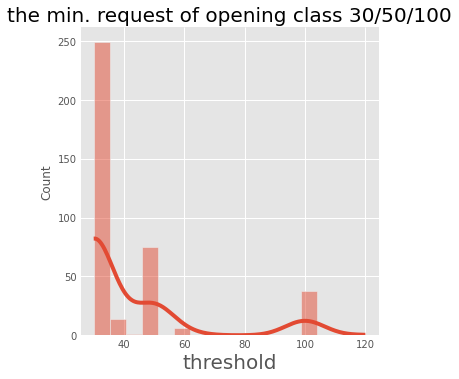

In [117]:
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
sns.displot(df.successCriti,kde=True)
plt.title("the min. request of opening class 30/50/100",fontsize=20)
plt.xlabel("threshold",fontsize=20)
#預售時30人開班的課程最多

In [118]:
#solidTickets / successCriti 實際上課人數/需要募資人數
#預期比率 Await
df["await"]=df.solidTickets/df.successCriti
df.sort_values("await",ascending=False).head(20)
#大家願意掏錢買的爆買課程
#python課 在hahow學校非常熱門

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
320,320,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],213,4.60,False,100,990,1800,False,PUBLISHED,13581,6,1,135.810000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
66,66,用 Python 理財：打造自己的 AI 股票理專,FinLab,2019-04-18,2019-03-20,2019-06-17,NaN,[],56,4.95,False,30,2499,3999,False,PUBLISHED,2332,4,1,77.733333
243,243,從入門到業界實戰 - UI / UX 前端網頁設計,Louis,2017-05-27,2017-04-27,2017-07-11,NaN,[],80,4.80,False,30,650,2500,False,PUBLISHED,2317,5,1,77.233333
75,75,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",237,4.92,False,100,1200,1800,False,PUBLISHED,7619,3,1,76.190000
175,175,從上手到專業，寫出你想要的文案效果,林育聖,2018-04-04,2018-03-06,2018-05-04,NaN,[],82,4.83,False,30,1280,1680,False,PUBLISHED,2247,4,1,74.900000
280,280,比ㄅㄆㄇ簡單的韓語發音,王稚鈞,2016-11-05,2016-10-06,2016-11-30,NaN,[],84,5.00,False,50,990,1590,False,PUBLISHED,3530,11,1,70.600000
339,339,AE/MG || 動畫特效 Vol.1,Yan-K,2016-03-24,2016-02-23,2016-04-30,NaN,[],149,4.86,False,50,1000,1500,False,PUBLISHED,3395,3,1,67.900000
49,49,聲入人心-周震宇的人聲必修課,周震宇,2019-06-19,2019-05-21,2019-08-18,2019-05-20T16:00:00.000Z,['DIGITAL'],19,5.00,False,30,1680,2680,False,PUBLISHED,1938,6,1,64.600000


In [124]:
pd.DataFrame(df.groupby(df.author).have.sum()).sort_values("have",ascending=False).head(15)
#最長在hahowd 開課程的人

,have
author,
藍 國峰,5
Weihang Lidance Chou,4
李柏鋒,4
圖文不符,4
1MustLearn,4
Chang Hong Lin,4
Rainie Chiang,3
Tina Wu,3
Hank Tom,3


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
379    4.88
380    4.29
381    4.76
382    4.45
383    4.79
Name: avg_ratings, Length: 384, dtype: float64
課程為零分 63


Text(0.5, 6.800000000000001, 'avg_rating')

<Figure size 1080x432 with 0 Axes>

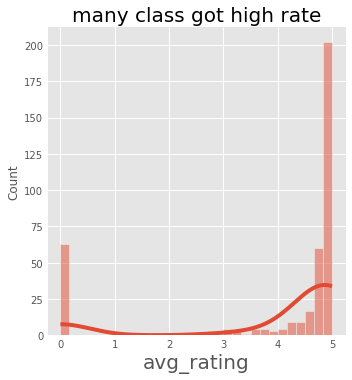

In [180]:
#觀察課程獲得評分

print(df["avg_ratings"])
df[(df.avg_ratings>=0)&(df.avg_ratings<3)]
print("課程為零分",(df["avg_ratings"]==0).sum())
##不少課程是沒有課程的評分


plt.style.use("ggplot")
plt.figure(figsize=(15,6))
#plt.hist(df["avg_ratings"],color="blue",alpha=0.7)
sns.displot(df.avg_ratings,kde=True)
plt.title("many class got high rate",fontsize=20)
plt.xlabel("avg_rating",fontsize=20)

count    384.000000
mean      31.208333
std       45.461008
min        0.000000
25%        6.000000
50%       15.000000
75%       36.250000
max      425.000000
Name: ratings, dtype: float64


Text(0.5, 6.800000000000001, 'commnet')

<Figure size 1080x432 with 0 Axes>

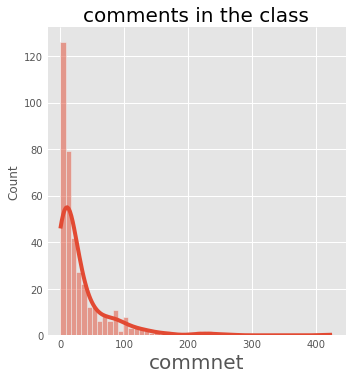

In [137]:
plt.style.use("ggplot")
plt.figure(figsize=(15,6))
print(df["ratings"].describe())
sns.displot(df["ratings"],kde=True)
plt.title("comments in the class",fontsize=20)
plt.xlabel("commnet",fontsize=20)
##頻均課程的留言數


In [164]:
print("評論大於100則課有",(df.ratings>100).sum())
df[df.ratings>100].sort_values("avg_ratings",ascending=False)

#高互動的課程頻分和留言的樣約呈現正向

評論大於100則課有 28


,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
209,209,打動人心的創作秘密，畫出個性的角色設計,水晶孔,2017-10-25,2017-09-26,2017-11-30,NaN,[],168,4.99,False,100,880,1280,False,PUBLISHED,3262,10,1,32.620000
240,240,不必下蠱的人心攻略術 — 小說實戰技術,朱宥勳,2017-06-04,2017-05-05,2017-08-03,NaN,[],101,4.98,False,30,800,1500,False,PUBLISHED,1642,6,1,54.733333
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
216,216,當個水彩甜點師 — 雪莉的午茶繪畫課,Sherry雪莉,2017-09-27,2017-08-29,2017-11-26,NaN,[],139,4.96,False,30,880,1200,False,PUBLISHED,1135,9,1,37.833333
329,329,Cartoon 插畫 - 人物篇 (●—●),JUN CHIU,2016-05-09,2016-04-09,2016-07-08,NaN,[],136,4.96,False,30,300,500,False,PUBLISHED,1392,5,1,46.400000
178,178,240 分鐘 - 忘掉拍照，學會攝影,子雍 Tzu-Yung,2018-03-28,2018-02-27,2018-05-27,NaN,[],170,4.96,False,120,1490,2049,False,PUBLISHED,2512,3,1,20.933333
207,207,小資族理財的第一堂入門課,李柏鋒,2017-10-31,2017-10-02,2017-12-30,NaN,[],218,4.96,False,60,888,1688,False,PUBLISHED,1647,10,1,27.450000
108,108,興趣變副業！打造自己的手作品牌,張譯蓁,2018-11-28,2018-10-30,2019-01-27,NaN,[],120,4.95,False,30,1500,2500,False,PUBLISHED,806,11,1,26.866667
206,206,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],129,4.95,False,100,1880,2400,False,PUBLISHED,5508,11,1,55.080000


count     384.000000
mean     1103.903646
std       676.481790
min        99.000000
25%       600.000000
50%       990.000000
75%      1500.000000
max      4800.000000
Name: prePrice, dtype: float64


Text(0.5, 6.800000000000001, 'per-price')

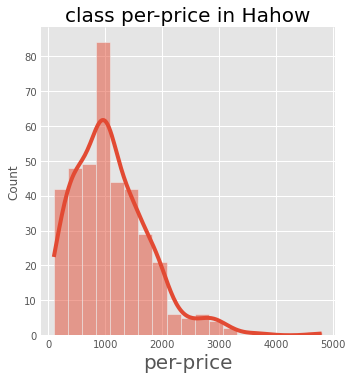

In [170]:
plt.style.use("ggplot")
print(df.prePrice.describe())
sns.displot(df.prePrice,kde=True)
plt.title("class per-price in Hahow",fontsize=20)
plt.xlabel("per-price",fontsize=20)
##課程預購時的售價
##大概在一千元左右

count     384.000000
mean     1673.153646
std       964.759503
min       150.000000
25%       996.750000
50%      1595.000000
75%      2200.000000
max      7680.000000
Name: price, dtype: float64


Text(0.5, 6.800000000000001, 'price')

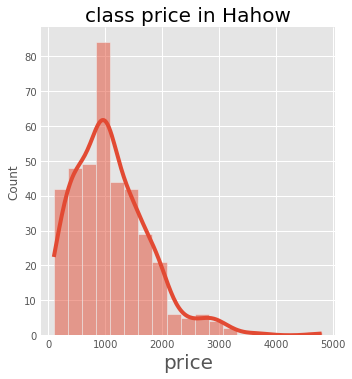

In [179]:
plt.style.use("ggplot")
print(df.price.describe())
sns.displot(df.prePrice,kde=True)
plt.title("class price in Hahow",fontsize=20)
plt.xlabel("price",fontsize=20)
##過了預購時課程售價
#可以發現平均而言差異不太大

修課人數和評價相關係數:
 0.7469550876856959


/Users/heng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'sold tickets')

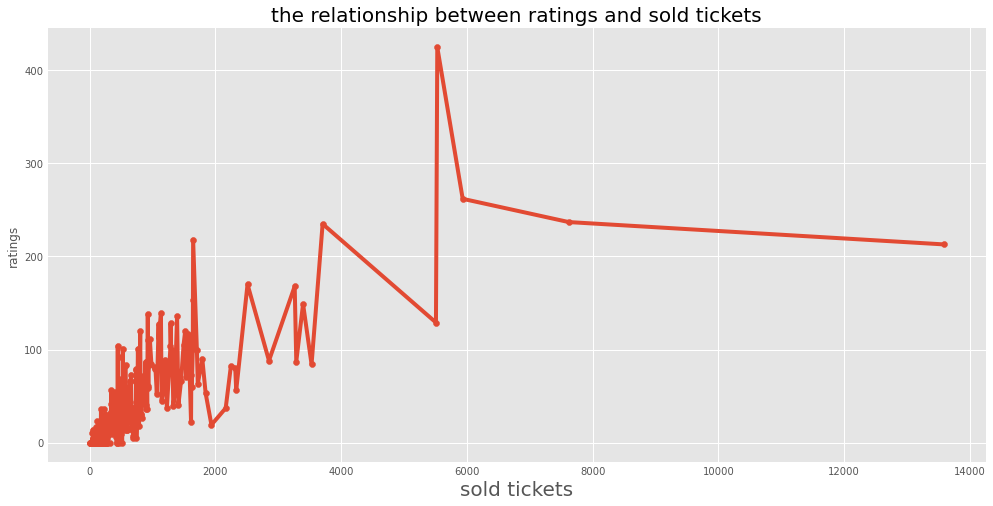

In [178]:
##是否越多的課成評價 會吸引人去夠買課

plt.figure(figsize=(15,8))
print("修課人數和評價相關係數:\n",np.corrcoef(df.solidTickets,df.ratings)[1,0])

sns.lineplot(df.solidTickets,df.ratings)
plt.scatter(df.solidTickets,df.ratings)
plt.title("the relationship between ratings and sold tickets",fontsize=20)
plt.xlabel("sold tickets",fontsize=20)